In [ ]:
Ques1 answer-

In [1]:
import pandas as pd 
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")


In [2]:
df=pd.read_csv("F:\wine.csv")
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.shape

(1599, 12)

In [4]:
#Let's remove duplicates first ,this will also help to work better on outliers

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(1359, 12)

In [7]:
df.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [8]:
#check for any null
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#observations
#No Nan's Present
#standard deviation< mean/average
#All except quality are continuous data
#quality is discrete data type
#Q1,Q2,Q3,Q4 seems to be in line with some deviations

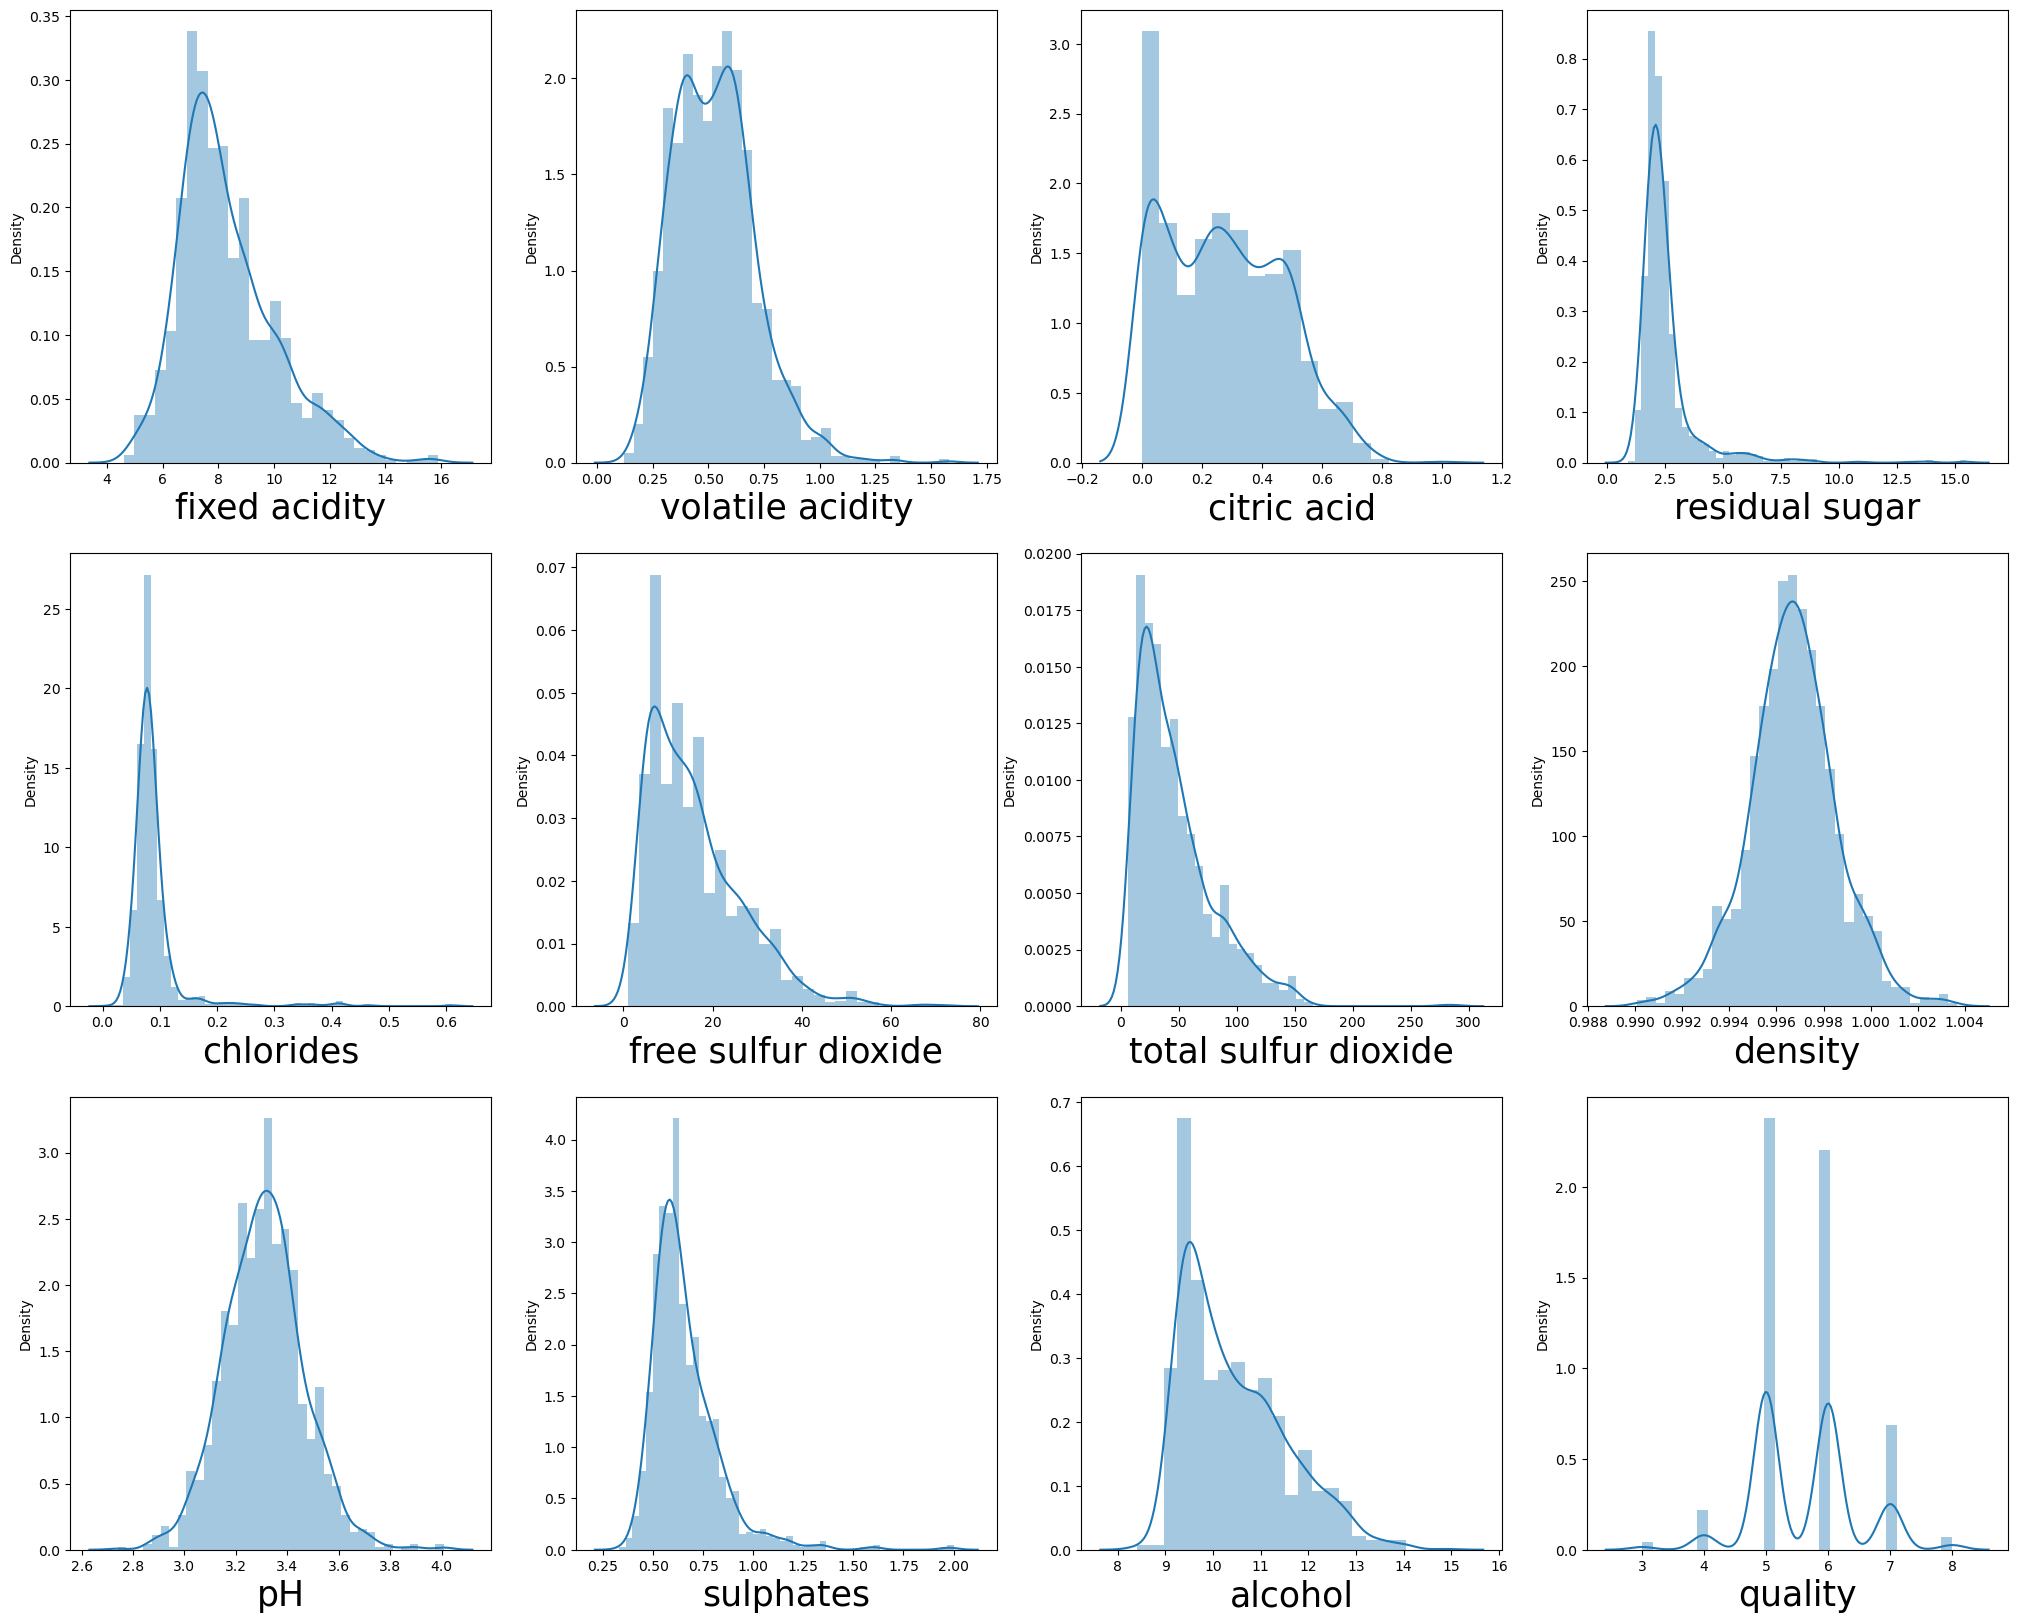

In [10]:
plt.figure(figsize=(25,20))
plot=1

for column in df:
   if plot<=12:
       a=plt.subplot(3,4,plot)
       sns.distplot(df[column])
       plt.xlabel(column, fontsize=25)
    
   plot +=1 
plt.show()

In [11]:
#here we can see many  outliers here 
 



In [12]:
#A hit map for more clarification:

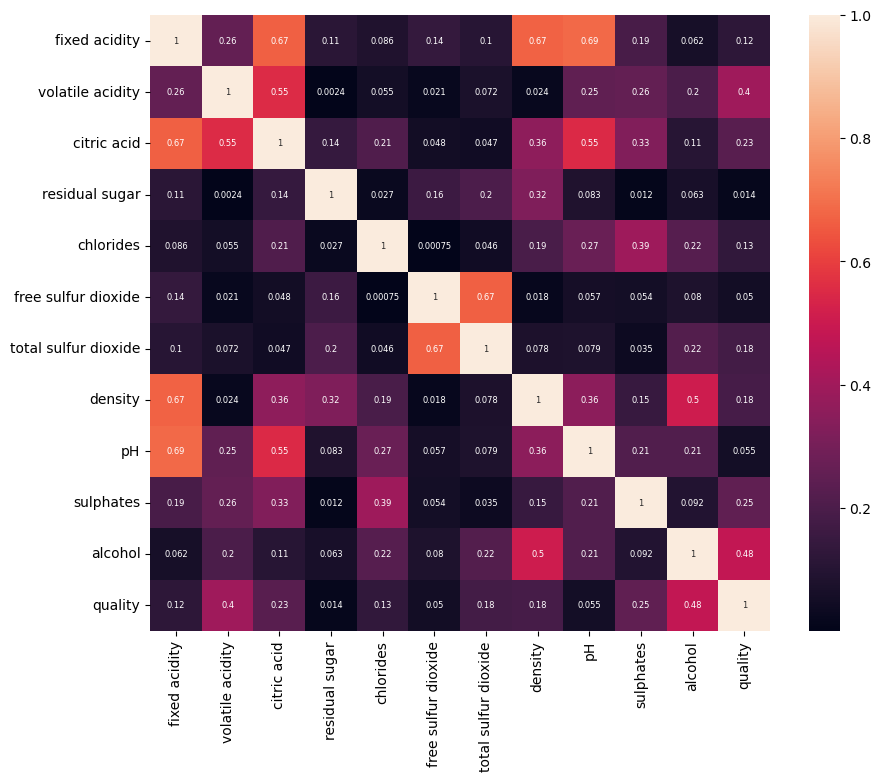

In [13]:
dfheat= df.corr().abs()
plt.figure(figsize=(10,8))
sns.heatmap(dfheat, annot=True, annot_kws={'size':6})
plt.show()

In [ ]:
# Adjusting outliers through z score method

In [14]:
from scipy.stats import zscore
score= zscore(df)
absscore=np.abs(score)

filtering= (absscore<5).all(axis=1)
df=df[filtering]
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000
mean,8.311858,0.530276,0.266782,2.459668,0.083079,15.754532,46.016994,0.996689,3.315038,0.647500,10.451674,5.629909
std,1.748690,0.181384,0.191847,1.044330,0.027244,10.261793,31.914887,0.001854,0.151417,0.140501,1.080721,0.822334
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.750000,0.995570,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997805,3.400000,0.720000,11.125000,6.000000
max,15.900000,1.330000,0.790000,9.000000,0.332000,68.000000,165.000000,1.003200,4.010000,1.360000,14.900000,8.000000


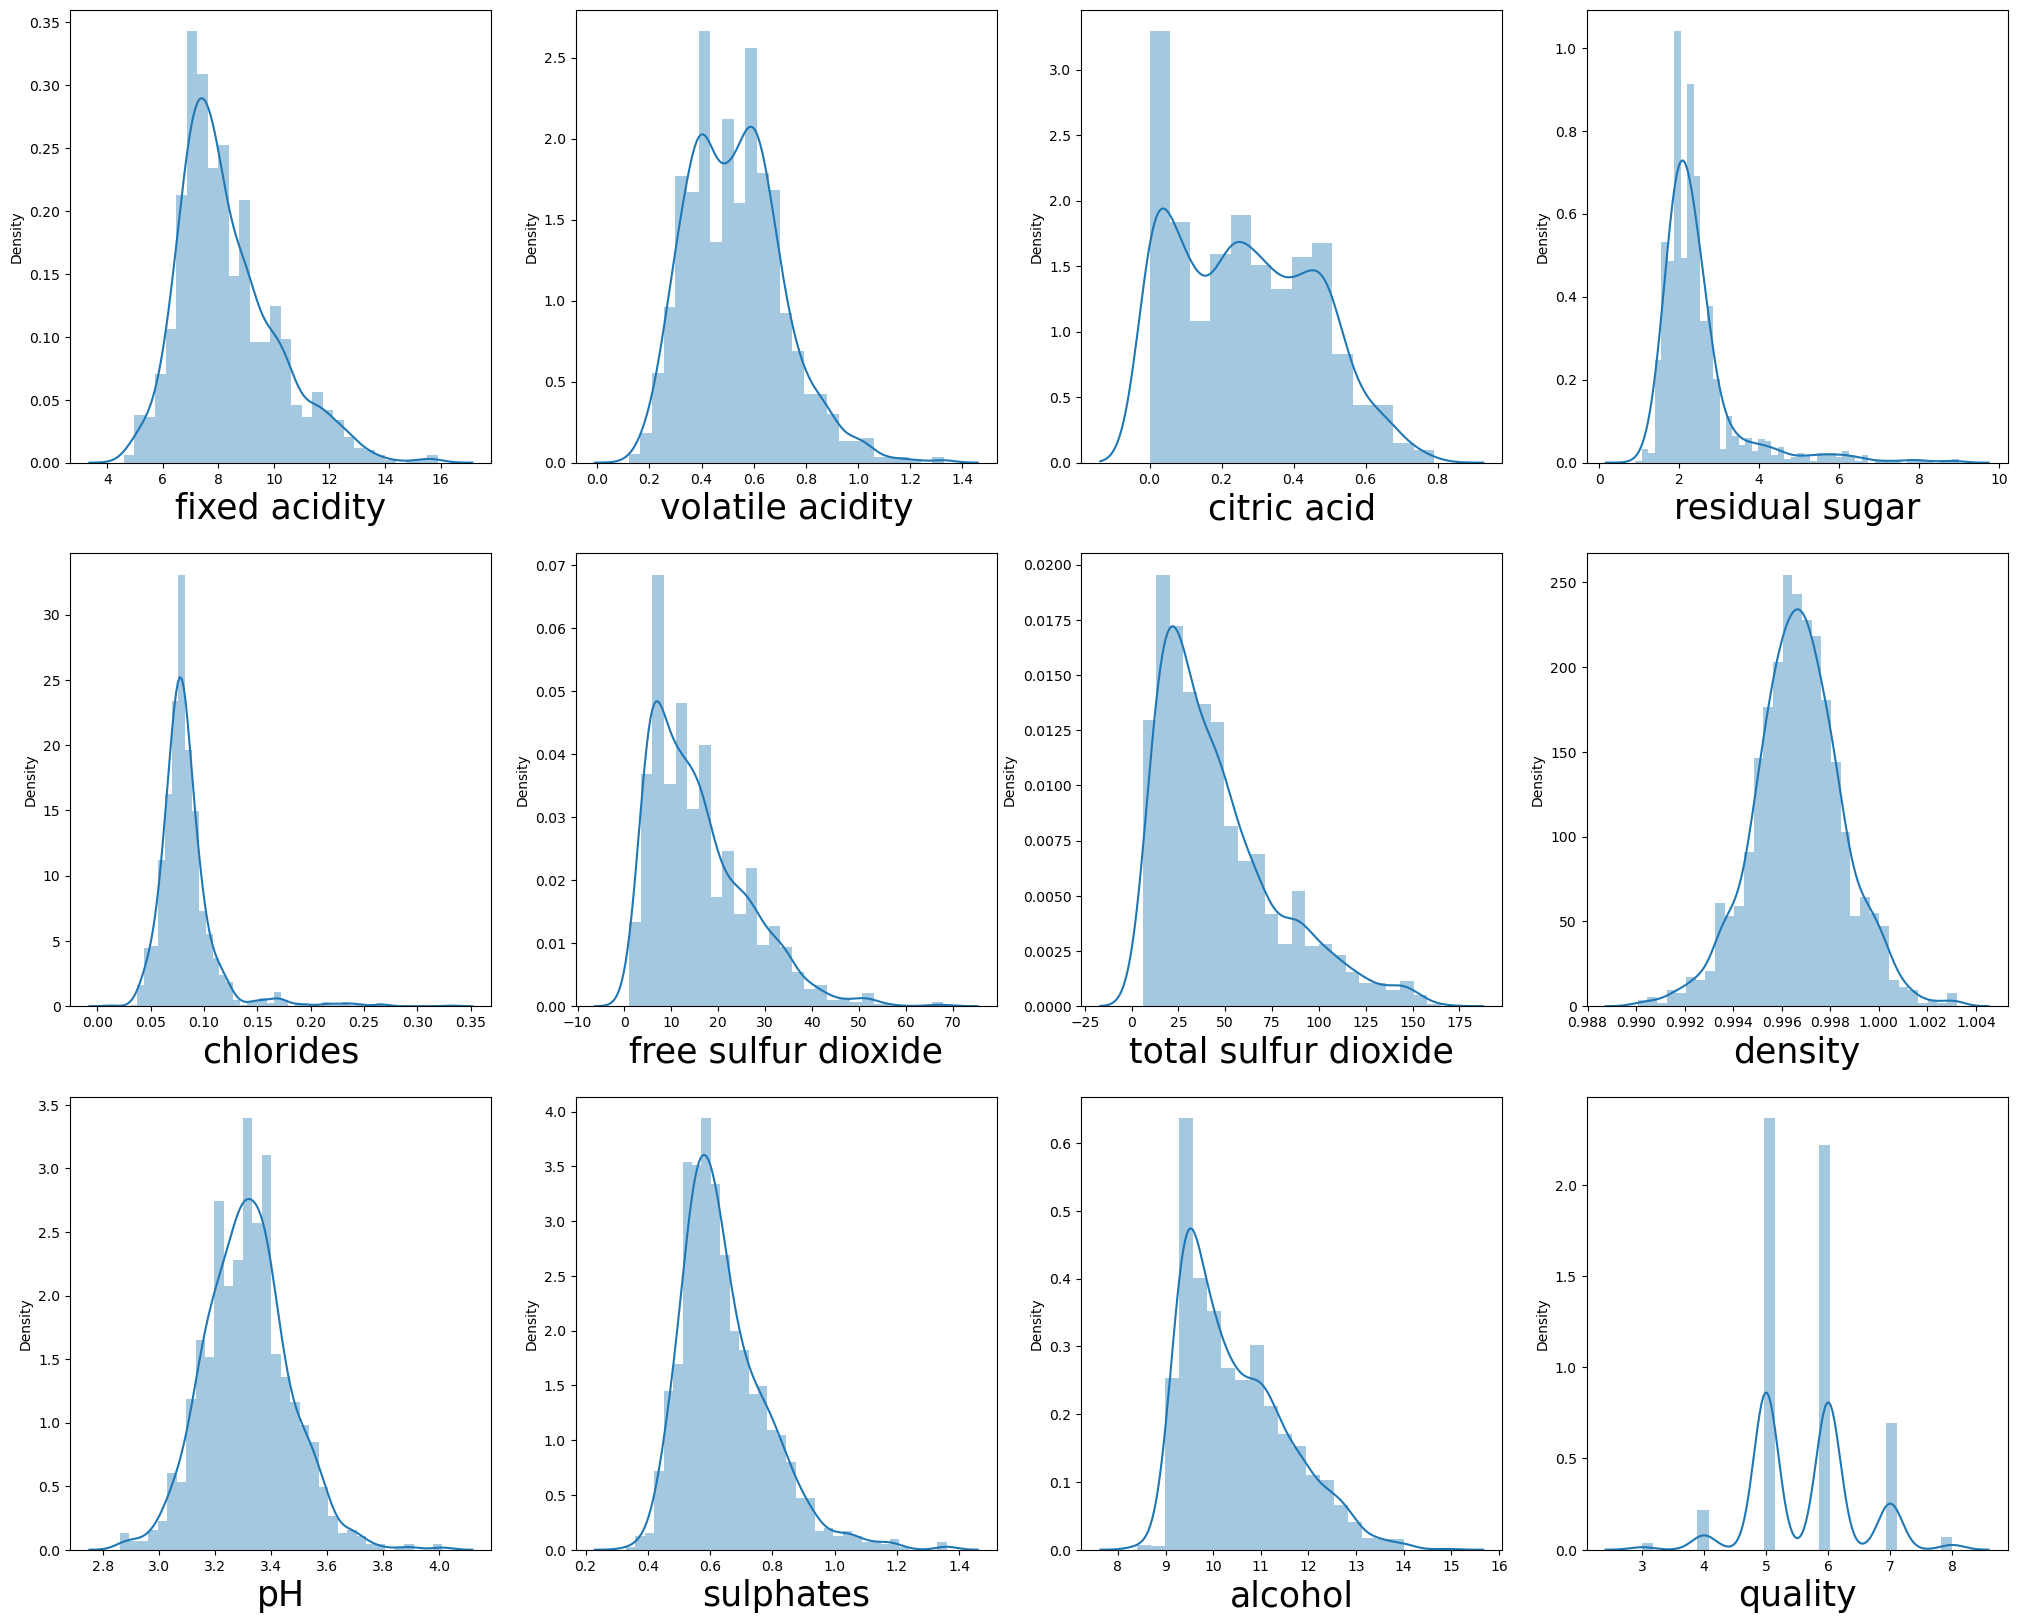

In [15]:
plt.figure(figsize=(25,20))
plot=1

for column in df:
   if plot<=12:
       a=plt.subplot(3,4,plot)
       sns.distplot(df[column])
       plt.xlabel(column, fontsize=25)
    
   plot +=1 
plt.show()

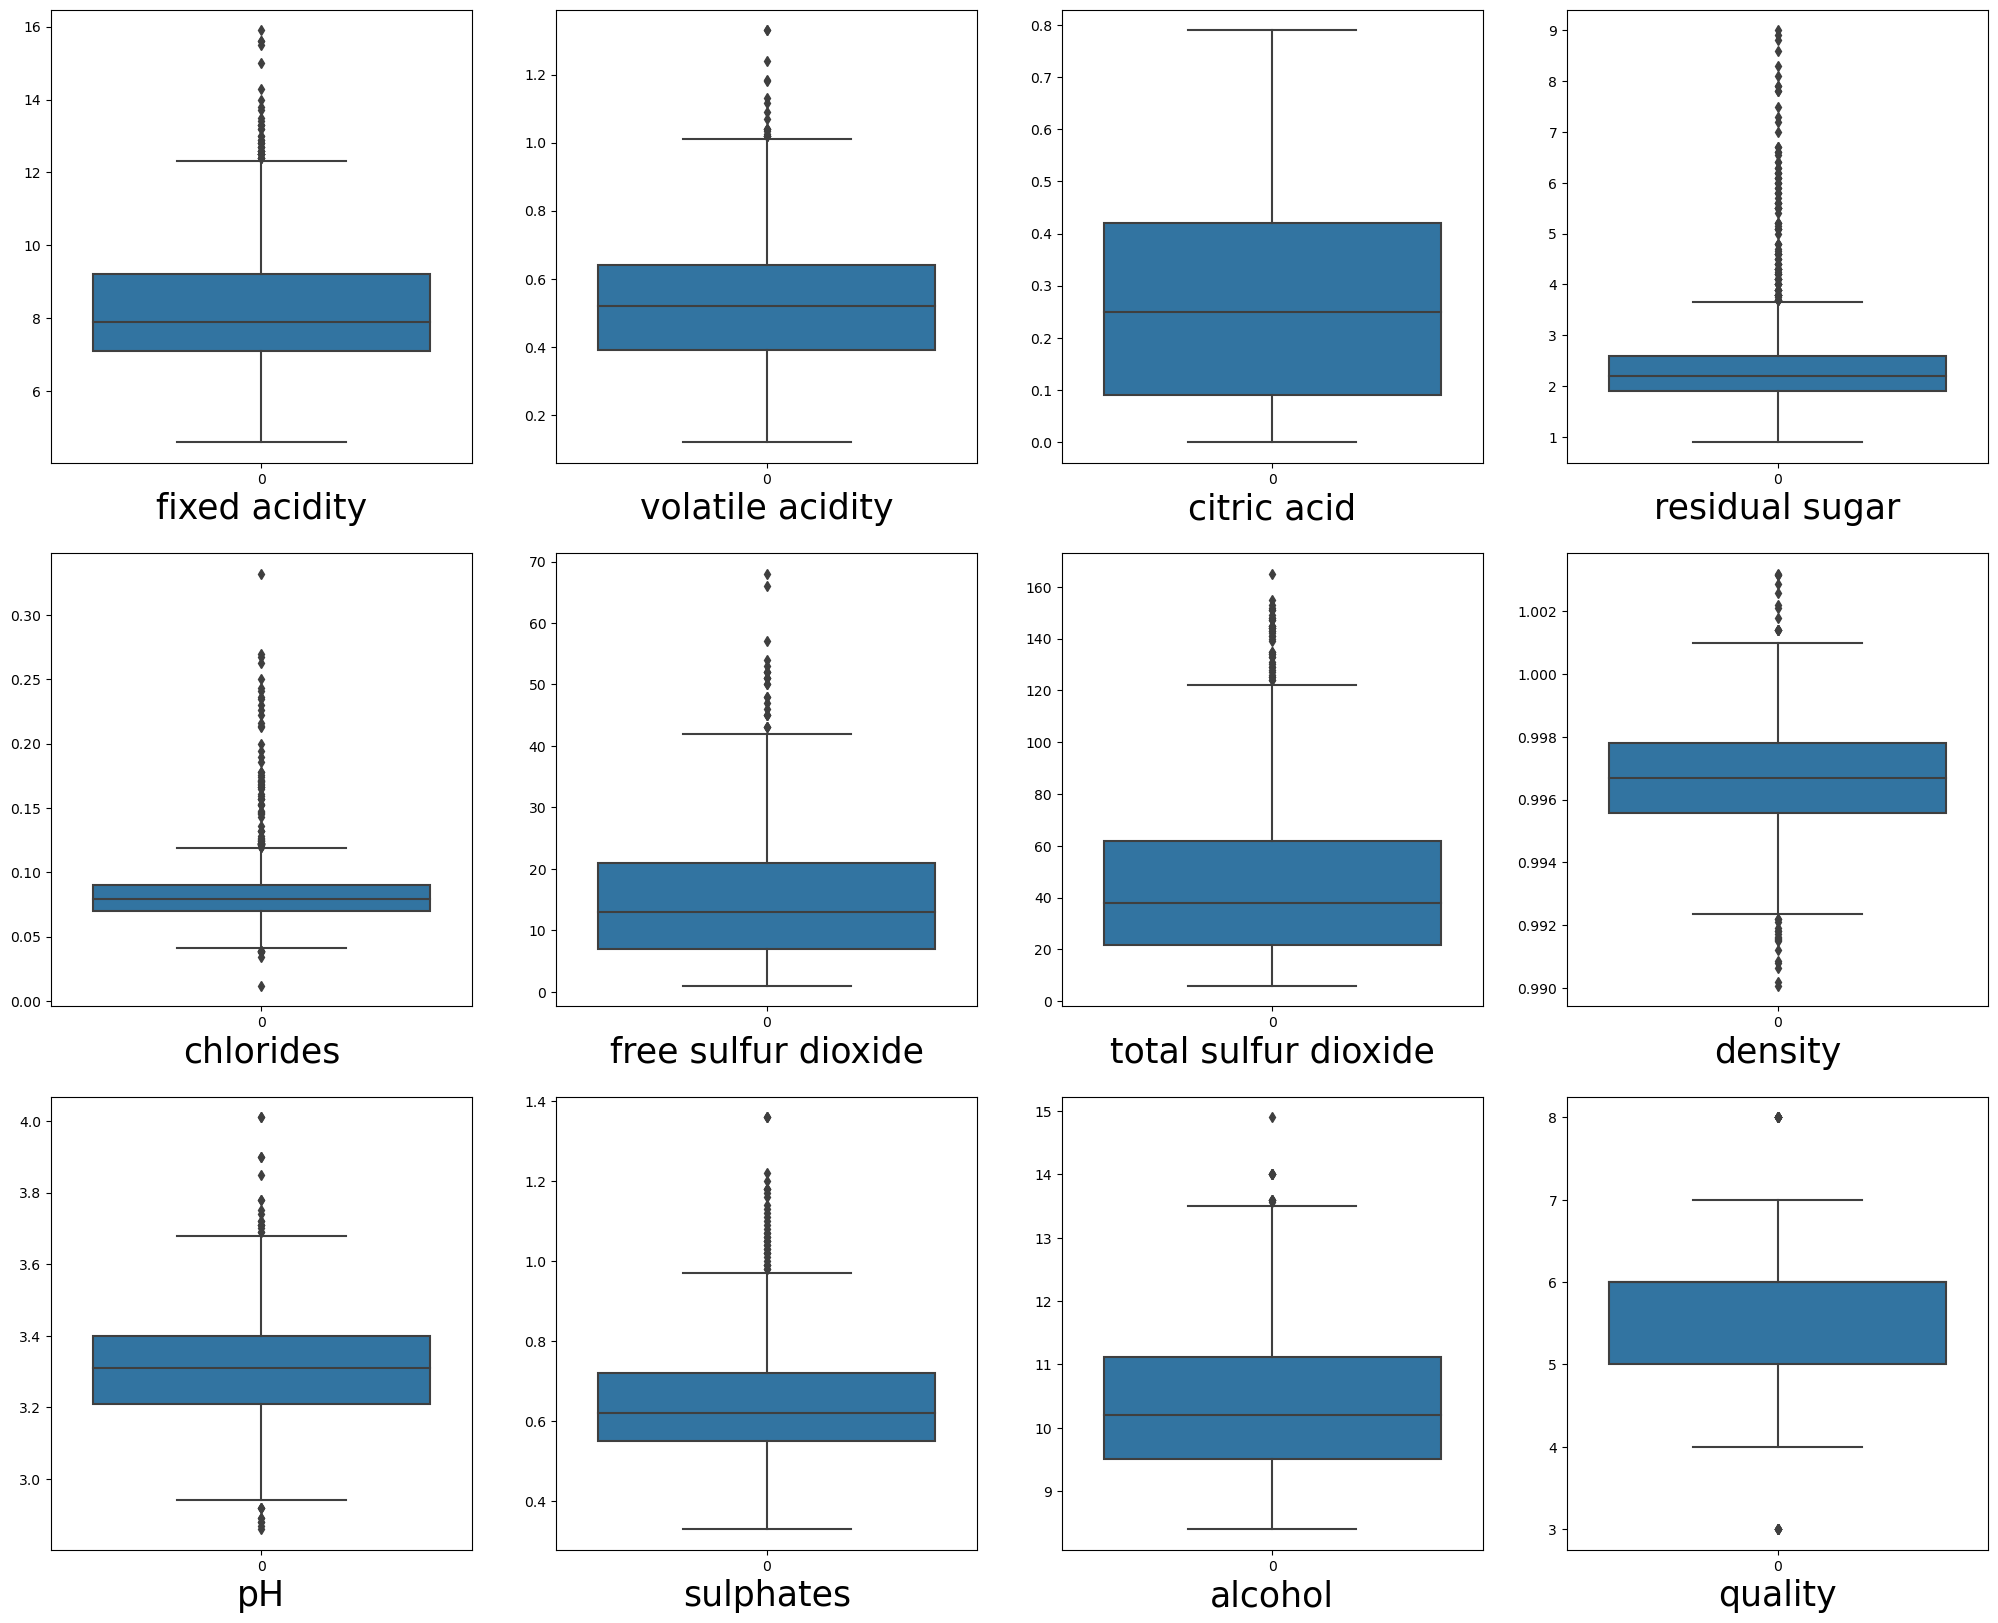

In [16]:
plt.figure(figsize=(25,20))
plot=1

for column in df:
   if plot<=12:
       a=plt.subplot(3,4,plot)
       sns.boxplot(df[column])
       plt.xlabel(column, fontsize=25)
    
   plot +=1 
plt.show()

In [17]:
# Let's remove outlier in  alcohol, total sulphur dioxide using inter quantile range method:


In [18]:
q3=df.quantile(0.75)
q3


fixed acidity            9.200000
volatile acidity         0.640000
citric acid              0.420000
residual sugar           2.600000
chlorides                0.090000
free sulfur dioxide     21.000000
total sulfur dioxide    62.000000
density                  0.997805
pH                       3.400000
sulphates                0.720000
alcohol                 11.125000
quality                  6.000000
Name: 0.75, dtype: float64

In [19]:
q1=df.quantile(0.25)
q1

fixed acidity            7.10000
volatile acidity         0.39000
citric acid              0.09000
residual sugar           1.90000
chlorides                0.07000
free sulfur dioxide      7.00000
total sulfur dioxide    21.75000
density                  0.99557
pH                       3.21000
sulphates                0.55000
alcohol                  9.50000
quality                  5.00000
Name: 0.25, dtype: float64

In [20]:
iqr=q3-q1
iqr

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.250000
density                  0.002235
pH                       0.190000
sulphates                0.170000
alcohol                  1.625000
quality                  1.000000
dtype: float64

In [21]:
sulfur= (q3[6] + (1.5 * iqr[6]))
print(sulfur)

122.375


In [22]:
row=df['total sulfur dioxide']

In [23]:
index= np.where(row>sulfur)
print(index)
df= df.drop(df.index[index])
print(df.shape)
df.reset_index()

(array([  11,   12,   75,   77,   90,  109,  120,  127,  128,  155,  156,
        157,  159,  167,  184,  258,  293,  330,  347,  349,  387,  430,
        437,  438,  495,  534,  535,  544,  546,  564,  574,  582,  621,
        644,  645,  661,  938, 1156, 1171, 1232, 1292], dtype=int64),)
(1283, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1279,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1280,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1281,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [24]:
t_sulfur= (q3[5] + (1.5 * iqr[5]))
print(t_sulfur)

42.0


In [25]:
row1=df['free sulfur dioxide']

In [26]:
index= np.where(row1>t_sulfur)
print(index)
df= df.drop(df.index[index])
print(df.shape)
df.reset_index()

(array([  47,  397,  464,  507,  538,  733,  734,  780,  856,  923,  924,
        940,  973,  986, 1005, 1037, 1083, 1251], dtype=int64),)
(1265, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1261,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1262,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1263,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [27]:
sugar= (q3[3] + (1.5 * iqr[3]))
print(sugar)

3.6500000000000004


In [28]:
row2=df['residual sugar']

In [29]:
index= np.where(row2>sugar)
print(index)
df= df.drop(df.index[index])
print(df.shape)
df.reset_index()

(array([   8,   12,   26,   30,   45,   53,  124,  125,  165,  208,  209,
        210,  212,  213,  214,  251,  275,  285,  294,  295,  297,  311,
        321,  322,  326,  348,  359,  384,  393,  396,  404,  407,  423,
        424,  426,  439,  440,  441,  442,  470,  480,  482,  497,  509,
        514,  520,  543,  554,  567,  583,  628,  692,  701,  711,  717,
        718,  720,  723,  738,  741,  743,  766,  812,  818,  822,  832,
        833,  845,  849,  854,  861,  878,  894,  898,  907,  929,  938,
        940,  951,  968,  977,  991, 1007, 1017, 1031, 1047, 1078, 1090,
       1096, 1106, 1118, 1129, 1133, 1137, 1158, 1163, 1181, 1193, 1194,
       1217, 1229, 1245, 1256], dtype=int64),)
(1162, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1158,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1159,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1160,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [30]:
alco= (q3.alcohol + (1.5* iqr.alcohol))
print(alco)
index= np.where(df['alcohol']> alco)
print(index)
df= df.drop(df.index[index])
print(df.shape)
df.reset_index()

13.5625
(array([ 105,  342,  426,  596,  821,  890,  918,  919, 1066, 1067],
      dtype=int64),)
(1152, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1148,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1149,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1150,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [31]:
sulfate= (q3.sulphates + (1.5* iqr.sulphates))
print(sulfate)
index= np.where(df['sulphates']> sulfate)
print(index)
df= df.drop(df.index[index])
print(df.shape)
df.reset_index()

0.9749999999999999
(array([  29,   60,  115,  129,  173,  244,  245,  246,  255,  270,  273,
        275,  350,  353,  354,  365,  366,  368,  422,  443,  460,  493,
        571,  616,  835,  841,  980,  983, 1006, 1010], dtype=int64),)
(1122, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1118,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1119,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1120,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [32]:
chlo= (q3.chlorides + (1.5* iqr.chlorides))
print(chlo)
index= np.where(df['chlorides']> chlo)
print(index)
df= df.drop(df.index[index])
print(df.shape)
df.reset_index()

0.11999999999999998
(array([  26,   28,   86,   90,  105,  212,  216,  217,  229,  232,  236,
        260,  291,  314,  354,  356,  379,  388,  389,  426,  439,  456,
        531,  532,  534,  535,  538,  549,  558,  577,  578,  616,  637,
        663,  707,  712,  765,  774,  803,  832,  834,  843,  853,  874,
        878,  930,  956,  999, 1098], dtype=int64),)
(1073, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1069,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1070,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1071,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


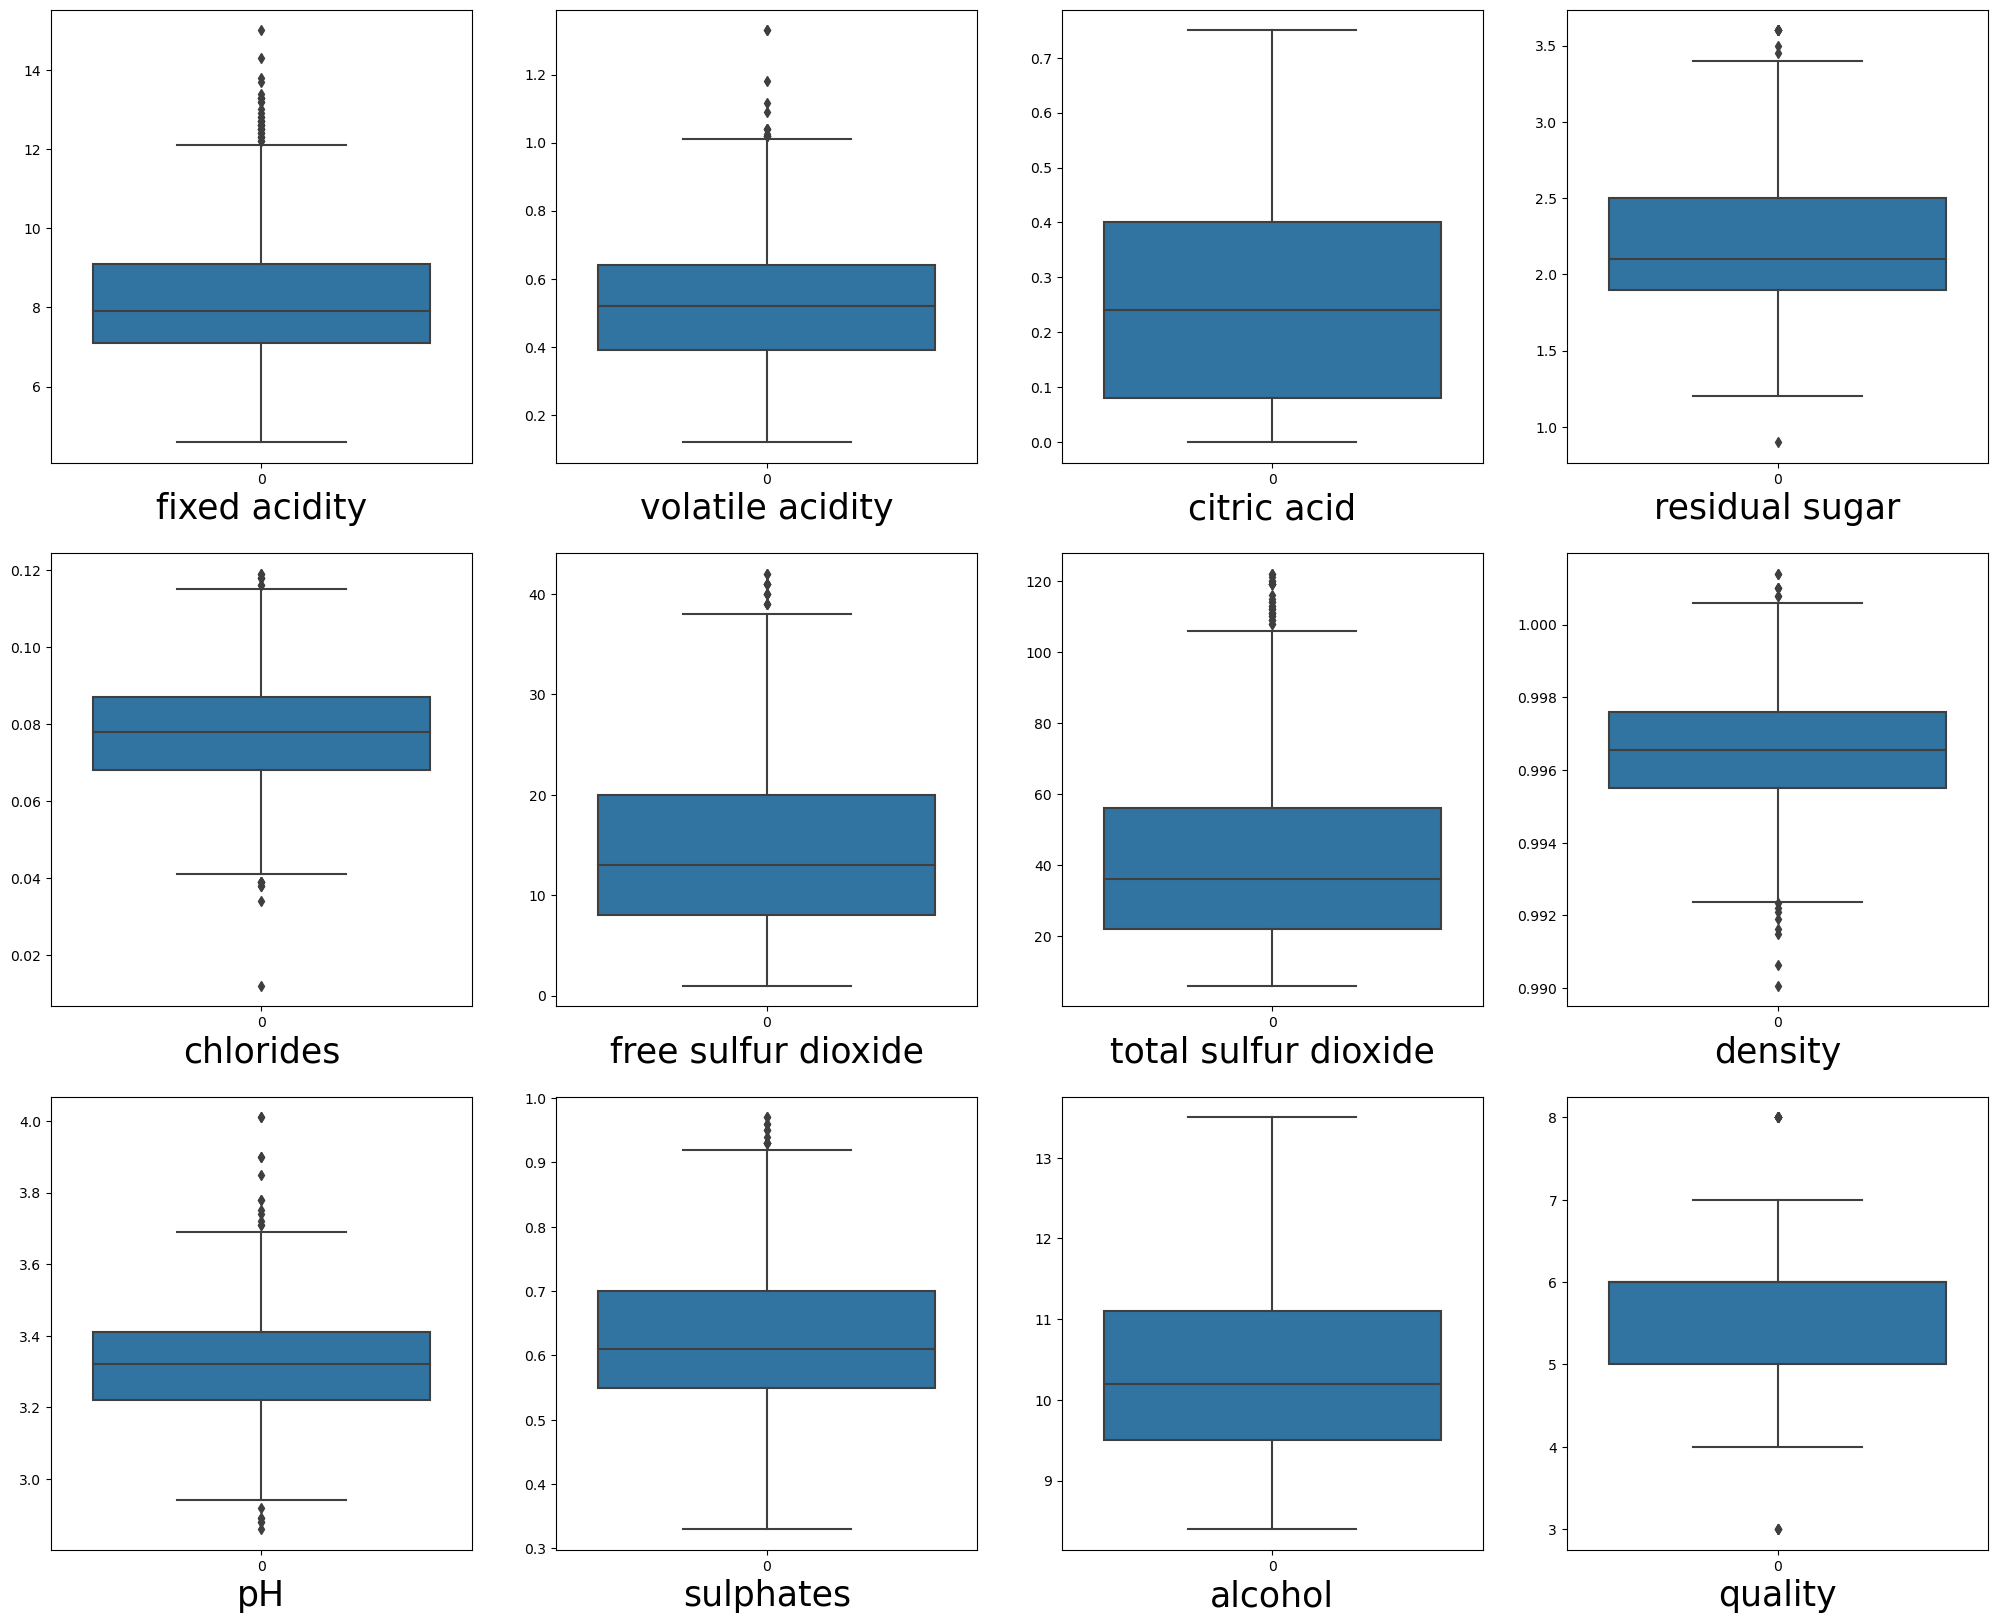

In [33]:
plt.figure(figsize=(25,20))
plot=1

for column in df:
   if plot<=12:
       a=plt.subplot(3,4,plot)
       sns.boxplot(df[column])
       plt.xlabel(column, fontsize=25)
    
   plot +=1 
plt.show()

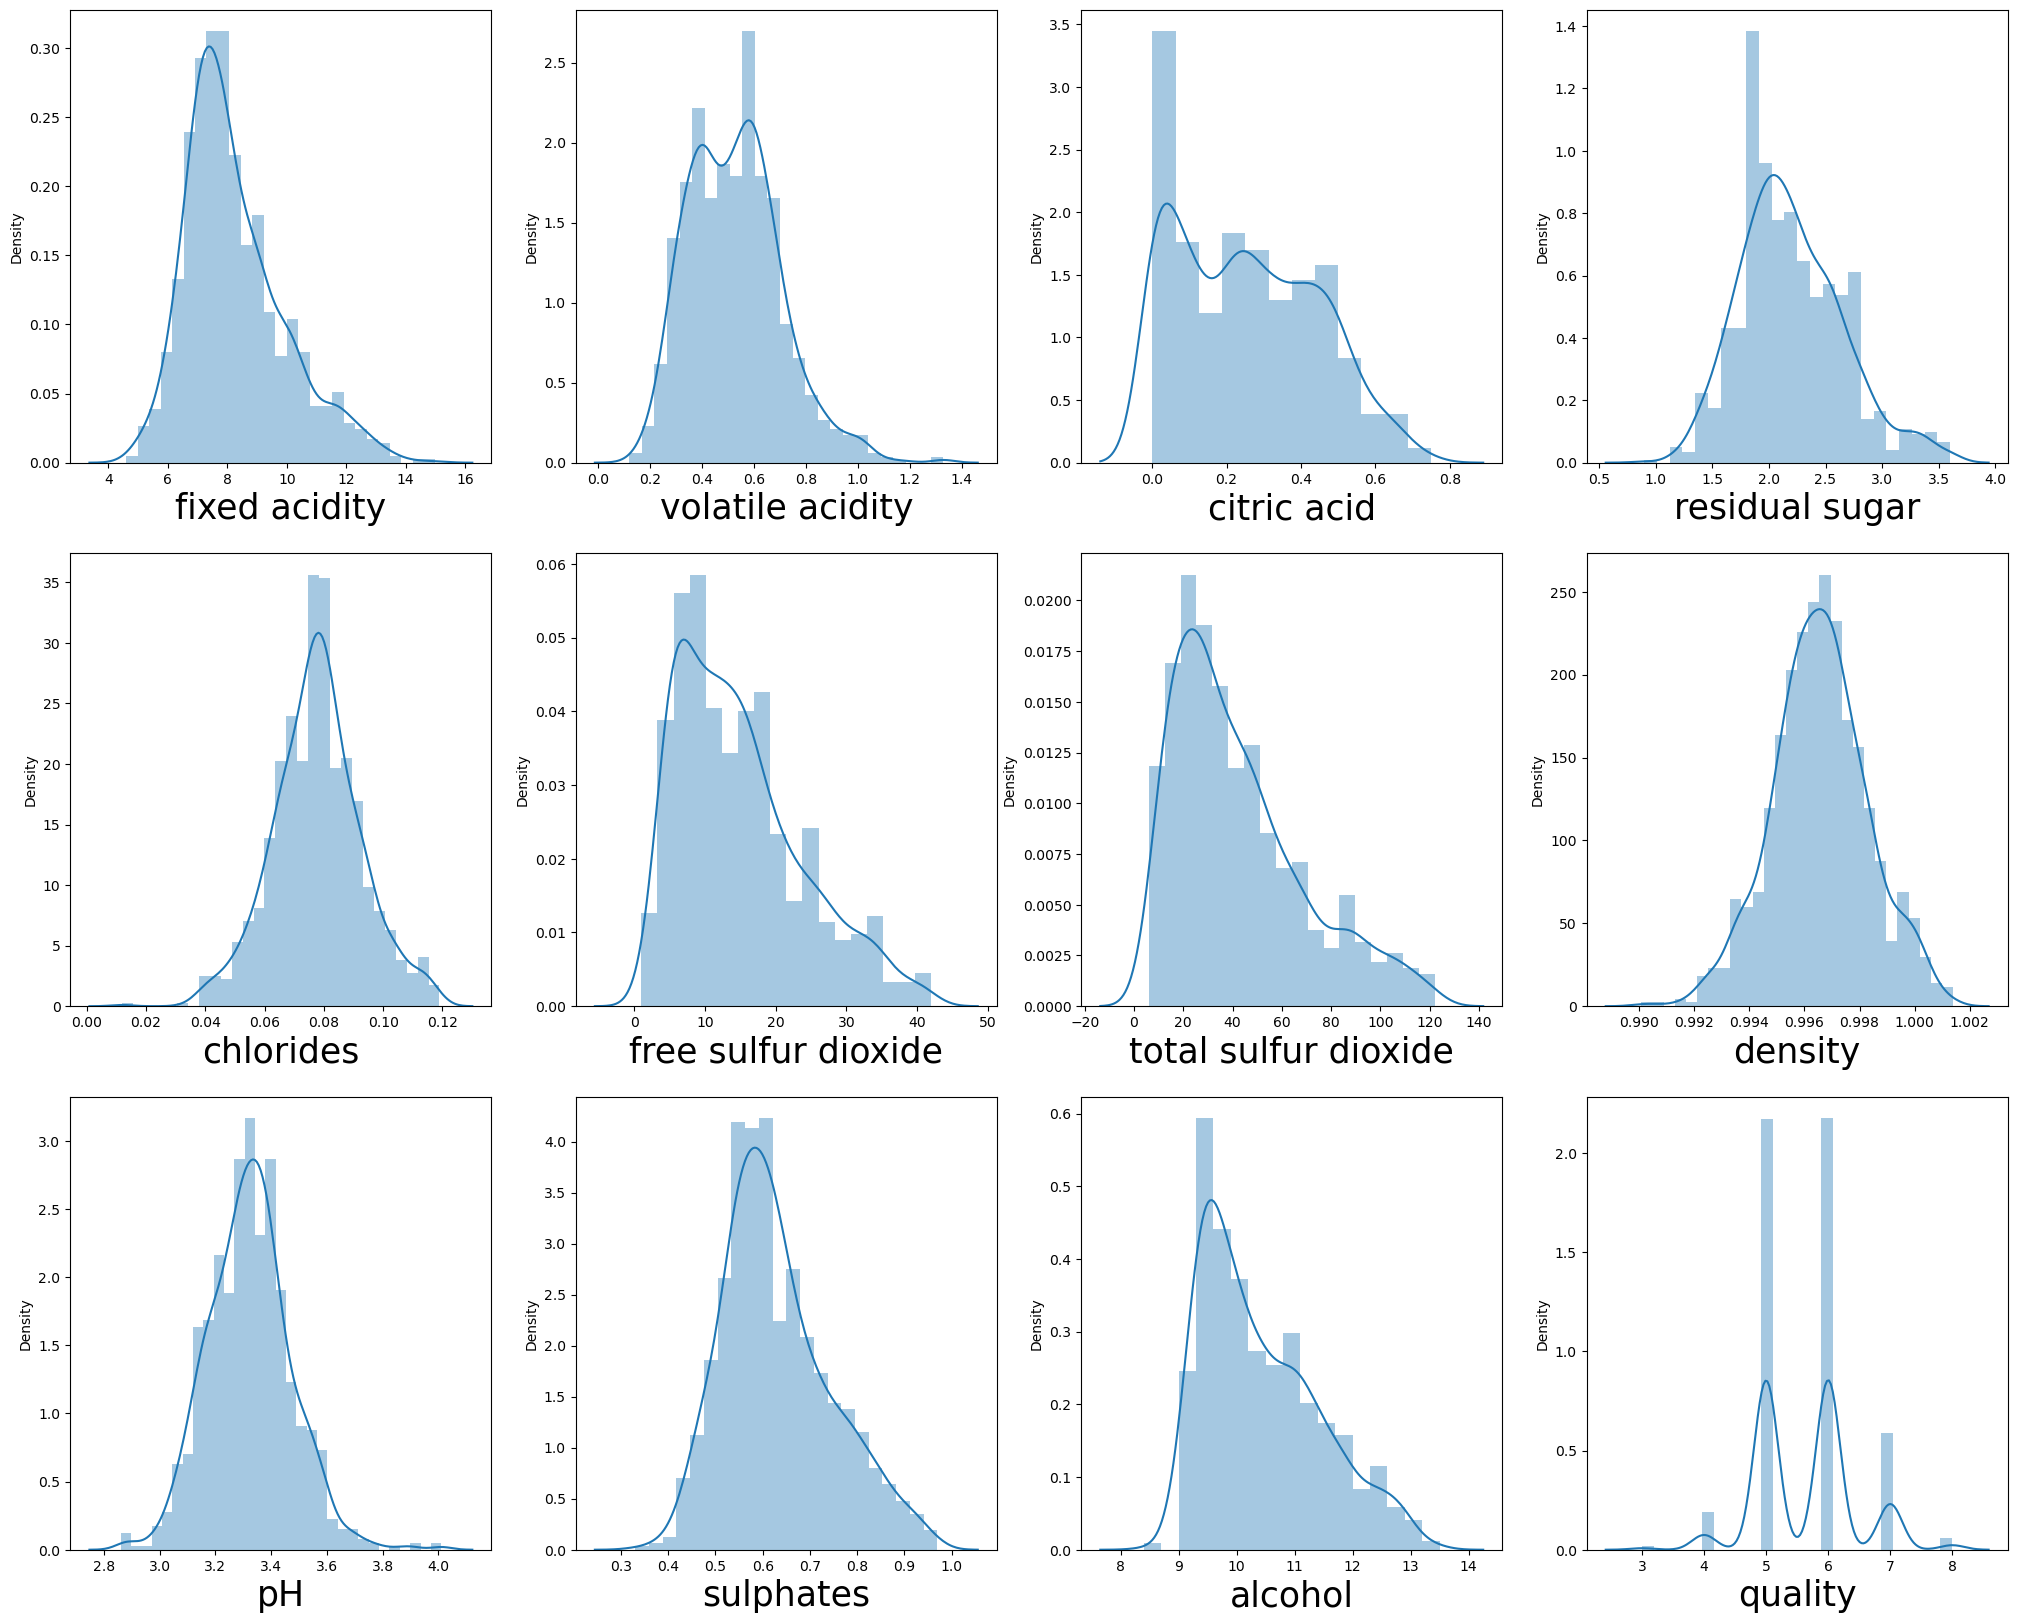

In [34]:
plt.figure(figsize=(25,20))
plot=1

for column in df:
   if plot<=12:
       a=plt.subplot(3,4,plot)
       sns.distplot(df[column])
       plt.xlabel(column, fontsize=25)
    
   plot +=1 
plt.show()

In [35]:
# separating features and labels

In [36]:
x=df.drop(columns=['quality'])
y=df['quality']
y

0       5
1       5
2       5
3       6
5       5
       ..
1593    6
1594    5
1595    6
1597    5
1598    6
Name: quality, Length: 1073, dtype: int64

In [37]:
 # 1 is for good quality and 0 for bad (not good) quality

In [38]:
Y = y.apply(lambda y_value:1 if y_value>=7 else 0)
Y

0       0
1       0
2       0
3       0
5       0
       ..
1593    0
1594    0
1595    0
1597    0
1598    0
Name: quality, Length: 1073, dtype: int64

In [39]:
#balancing using smote

In [40]:
y.value_counts()

6    449
5    448
7    121
4     39
8     12
3      4
Name: quality, dtype: int64

In [46]:
from imblearn.over_sampling import SMOTE
sample = SMOTE(k_neighbors=3, random_state=None)
x,y = sample.fit_resample(x,y)

In [124]:
y.value_counts()

5    413
6    413
7    413
4    413
8    413
Name: quality, dtype: int64

In [125]:
#model building

In [47]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.30, random_state=40)


In [48]:
def score(model,x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred=model.predict(x_train)
        print('Train result')
        print(f"Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train==False:
        pred=model.predict(x_test)
        print('Test result')
        print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
        print('report',classification_report(y_test,pred,digits=2))

In [49]:
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train) 

DecisionTreeClassifier()

In [50]:
score(tree,x_train, x_test, y_train, y_test, train=True)
score(tree,x_train, x_test, y_train, y_test, train=False)

Train result
Accuracy score:100.00%
Test result
Accuracy score:73.67%
report               precision    recall  f1-score   support

           3       0.99      0.99      0.99       159
           4       0.83      0.89      0.86       130
           5       0.48      0.49      0.49       119
           6       0.40      0.35      0.37       142
           7       0.68      0.75      0.72       130
           8       0.94      0.91      0.92       129

    accuracy                           0.74       809
   macro avg       0.72      0.73      0.73       809
weighted avg       0.73      0.74      0.73       809



In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

In [52]:
random_model=RandomForestClassifier()
random_model.fit(x_train,y_train) 

RandomForestClassifier()

In [53]:
score(random_model,x_train, x_test, y_train, y_test, train=True)
score(random_model,x_train, x_test, y_train, y_test, train=False)

Train result
Accuracy score:100.00%
Test result
Accuracy score:84.05%
report               precision    recall  f1-score   support

           3       1.00      1.00      1.00       159
           4       0.90      0.99      0.94       130
           5       0.65      0.70      0.67       119
           6       0.67      0.42      0.51       142
           7       0.76      0.95      0.85       130
           8       0.99      0.98      0.98       129

    accuracy                           0.84       809
   macro avg       0.83      0.84      0.83       809
weighted avg       0.83      0.84      0.83       809



In [54]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(x_train,y_train)

LogisticRegression()

In [57]:
score(logistic,x_train, x_test, y_train, y_test, train=True)
score(logistic,x_train, x_test, y_train, y_test, train=False)

Train result
Accuracy score:51.99%
Test result
Accuracy score:49.32%
report               precision    recall  f1-score   support

           3       0.65      0.64      0.64       159
           4       0.46      0.56      0.51       130
           5       0.39      0.43      0.41       119
           6       0.42      0.27      0.33       142
           7       0.40      0.42      0.41       130
           8       0.59      0.64      0.61       129

    accuracy                           0.49       809
   macro avg       0.49      0.49      0.48       809
weighted avg       0.49      0.49      0.49       809



In [58]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [59]:
score(knn,x_train, x_test, y_train, y_test, train=True)
score(knn,x_train, x_test, y_train, y_test, train=False)

Train result
Accuracy score:64.35%
Test result
Accuracy score:61.93%
report               precision    recall  f1-score   support

           3       0.62      0.92      0.74       159
           4       0.59      0.79      0.68       130
           5       0.52      0.36      0.43       119
           6       0.58      0.13      0.21       142
           7       0.63      0.60      0.61       130
           8       0.69      0.88      0.77       129

    accuracy                           0.62       809
   macro avg       0.61      0.61      0.57       809
weighted avg       0.61      0.62      0.58       809



In [60]:
from sklearn.svm import SVC
params = {'n_estimators':[12,15],'criterion':['entropy','gini'],'max_depth':[10,5],'min_samples_split':[10,17],
         'min_samples_leaf':[4,6]}
grd=GridSearchCV(random_model,param_grid=params)
grd.fit(x_train,y_train)
print('best',grd.best_params_)

best {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 15}


In [61]:
random_model=grd.best_estimator_
random_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=6, min_samples_split=10,
                       n_estimators=15)

In [62]:
score(random_model,x_train, x_test, y_train, y_test, train=True)
score(random_model,x_train, x_test, y_train, y_test, train=False)

Train result
Accuracy score:89.50%
Test result
Accuracy score:78.86%
report               precision    recall  f1-score   support

           3       0.96      0.99      0.98       159
           4       0.85      0.90      0.88       130
           5       0.59      0.67      0.63       119
           6       0.60      0.37      0.46       142
           7       0.70      0.82      0.76       130
           8       0.93      0.96      0.95       129

    accuracy                           0.79       809
   macro avg       0.77      0.79      0.77       809
weighted avg       0.78      0.79      0.78       809



In [63]:
import scipy.stats as stats
from scipy.stats import zscore
from sklearn import metrics
%matplotlib inline
import scipy.stats as stats
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#Confusion Matrix

In [67]:
y_pred=random_model.predict(x_test)
conf=confusion_matrix(y_test,y_pred)
conf

array([[158,   0,   0,   1,   0,   0],
       [  4, 117,   6,   3,   0,   0],
       [  2,   9,  80,  20,   7,   1],
       [  0,   9,  45,  52,  34,   2],
       [  0,   2,   5,  10, 107,   6],
       [  0,   0,   0,   0,   5, 124]], dtype=int64)

In [ ]:
#Roc-Auc Curve

Threshhold of Logistic Regression [1.62268888e+00 6.22688876e-01 5.97140243e-01 5.81244272e-01
 5.80556776e-01 5.76067407e-01 5.72826962e-01 5.68989468e-01
 5.65689435e-01 5.62374677e-01 5.61085323e-01 5.53797750e-01
 5.52750907e-01 5.48722619e-01 5.47428442e-01 5.43197667e-01
 5.42244563e-01 5.41043387e-01 5.33195438e-01 5.31334568e-01
 5.31173358e-01 5.23522228e-01 5.11019251e-01 5.07374173e-01
 5.05947528e-01 5.02876169e-01 4.99483936e-01 4.99278134e-01
 4.91517007e-01 4.88040168e-01 4.86181983e-01 4.85527006e-01
 4.84472799e-01 4.83749765e-01 4.80016535e-01 4.79237889e-01
 4.79210121e-01 4.78918347e-01 4.77100830e-01 4.69729502e-01
 4.68143607e-01 4.67160423e-01 4.64667007e-01 4.55588624e-01
 4.54863830e-01 4.49617146e-01 4.45059427e-01 4.40768906e-01
 4.39804894e-01 4.32652782e-01 4.30063475e-01 4.28405177e-01
 4.22342323e-01 4.16636772e-01 4.15833722e-01 4.14325461e-01
 4.11956951e-01 4.07448343e-01 4.06472508e-01 4.05798558e-01
 4.04834463e-01 4.03643641e-01 4.02982239e-01 4.009

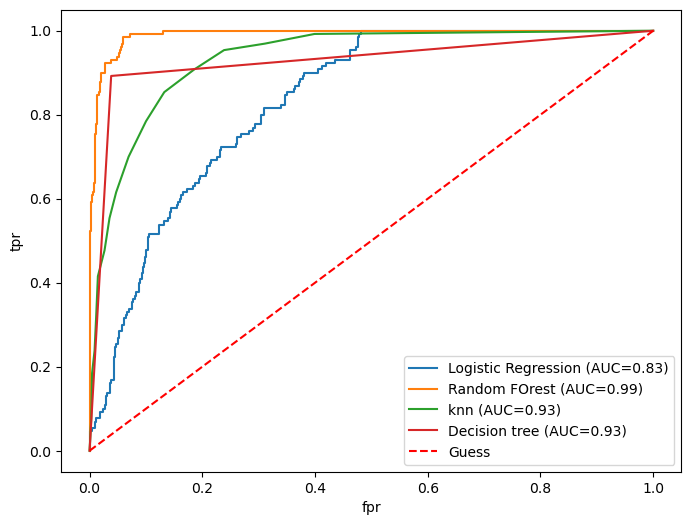

In [92]:
from sklearn.metrics import auc
models={'Logistic Regression':logistic, 'Random FOrest':random_model,'knn':knn,'Decision tree':tree}

plt.figure(figsize=(8,6))
for name,model in models.items():
    model.fit(x_train,y_train)
    y_prob=model.predict_proba(x_test)[:,1]
    fpr,tpr,_ = roc_curve(y_test,y_prob,pos_label=4)
    print('Threshhold of',name,_)
    roc_auc= auc(fpr,tpr)
    
    plt.plot(fpr,tpr,label='{} (AUC={:.2f})'.format(name,roc_auc))
    
plt.plot([0,1],[0,1],linestyle='--',color='red',label='Guess')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [ ]:
#Question 2 answer-

In [168]:

from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
from sklearn.preprocessing import OneHotEncoder

In [169]:
df2=pd.read_csv("F:\medical_cost_insurance.csv")
df2


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [170]:
# Here we can drop region column because region does not affects an insurance price
df2=df2.drop(columns='region',axis=1)


In [171]:
df2

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [172]:
#No null present verifying
df2.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
dtype: int64

In [173]:
df2.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker      charges
0      19  female  27.900         0    yes  16884.92400
1      18    male  33.770         1     no   1725.55230
2      28    male  33.000         3     no   4449.46200
3      33    male  22.705         0     no  21984.47061
4      32    male  28.880         0     no   3866.85520
...   ...     ...     ...       ...    ...          ...
1333   50    male  30.970         3     no  10600.54830
1334   18  female  31.920         0     no   2205.98080
1335   18  female  36.850         0     no   1629.83350
1336   21  female  25.800         0     no   2007.94500
1337   61  female  29.070         0    yes  29141.36030

[1338 rows x 6 columns]>

In [174]:
#removing duplicates
df2.drop_duplicates(inplace=True)
df2.shape

(1337, 6)

In [175]:
#let's encode object types
#for smoker=1, non-smoker=0
# replace diabetes column value 
df2['smoker'].replace({"yes":1, "no":0}, inplace=True)
df2       

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,1,16884.92400
1,18,male,33.770,1,0,1725.55230
2,28,male,33.000,3,0,4449.46200
3,33,male,22.705,0,0,21984.47061
4,32,male,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,0,10600.54830
1334,18,female,31.920,0,0,2205.98080
1335,18,female,36.850,0,0,1629.83350
1336,21,female,25.800,0,0,2007.94500


In [176]:
#Filter categorical features

In [177]:
object_t=list(df2.select_dtypes(include='object'))
object_t

['sex']

In [178]:
#encoding using get_dummies

In [179]:
df_dum= pd.get_dummies(df[object_t],drop_first=True)

In [180]:
#we can observe here male =1,female=0
df_dum

,sex_male
0,0
1,1
2,1
3,1
4,1
...,...
1333,1
1334,0
1335,0
1336,0


In [181]:
#Let's join this in our data and remove original column
df2=df2.join(df_dum)
df2.drop(columns='sex',inplace=True)
df2.rename(columns={"sex_male": "Sex"}, inplace=True)
df2

,age,bmi,children,smoker,charges,Sex
0,19,27.900,0,1,16884.92400,0
1,18,33.770,1,0,1725.55230,1
2,28,33.000,3,0,4449.46200,1
3,33,22.705,0,0,21984.47061,1
4,32,28.880,0,0,3866.85520,1
...,...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830,1
1334,18,31.920,0,0,2205.98080,0
1335,18,36.850,0,0,1629.83350,0
1336,21,25.800,0,0,2007.94500,0


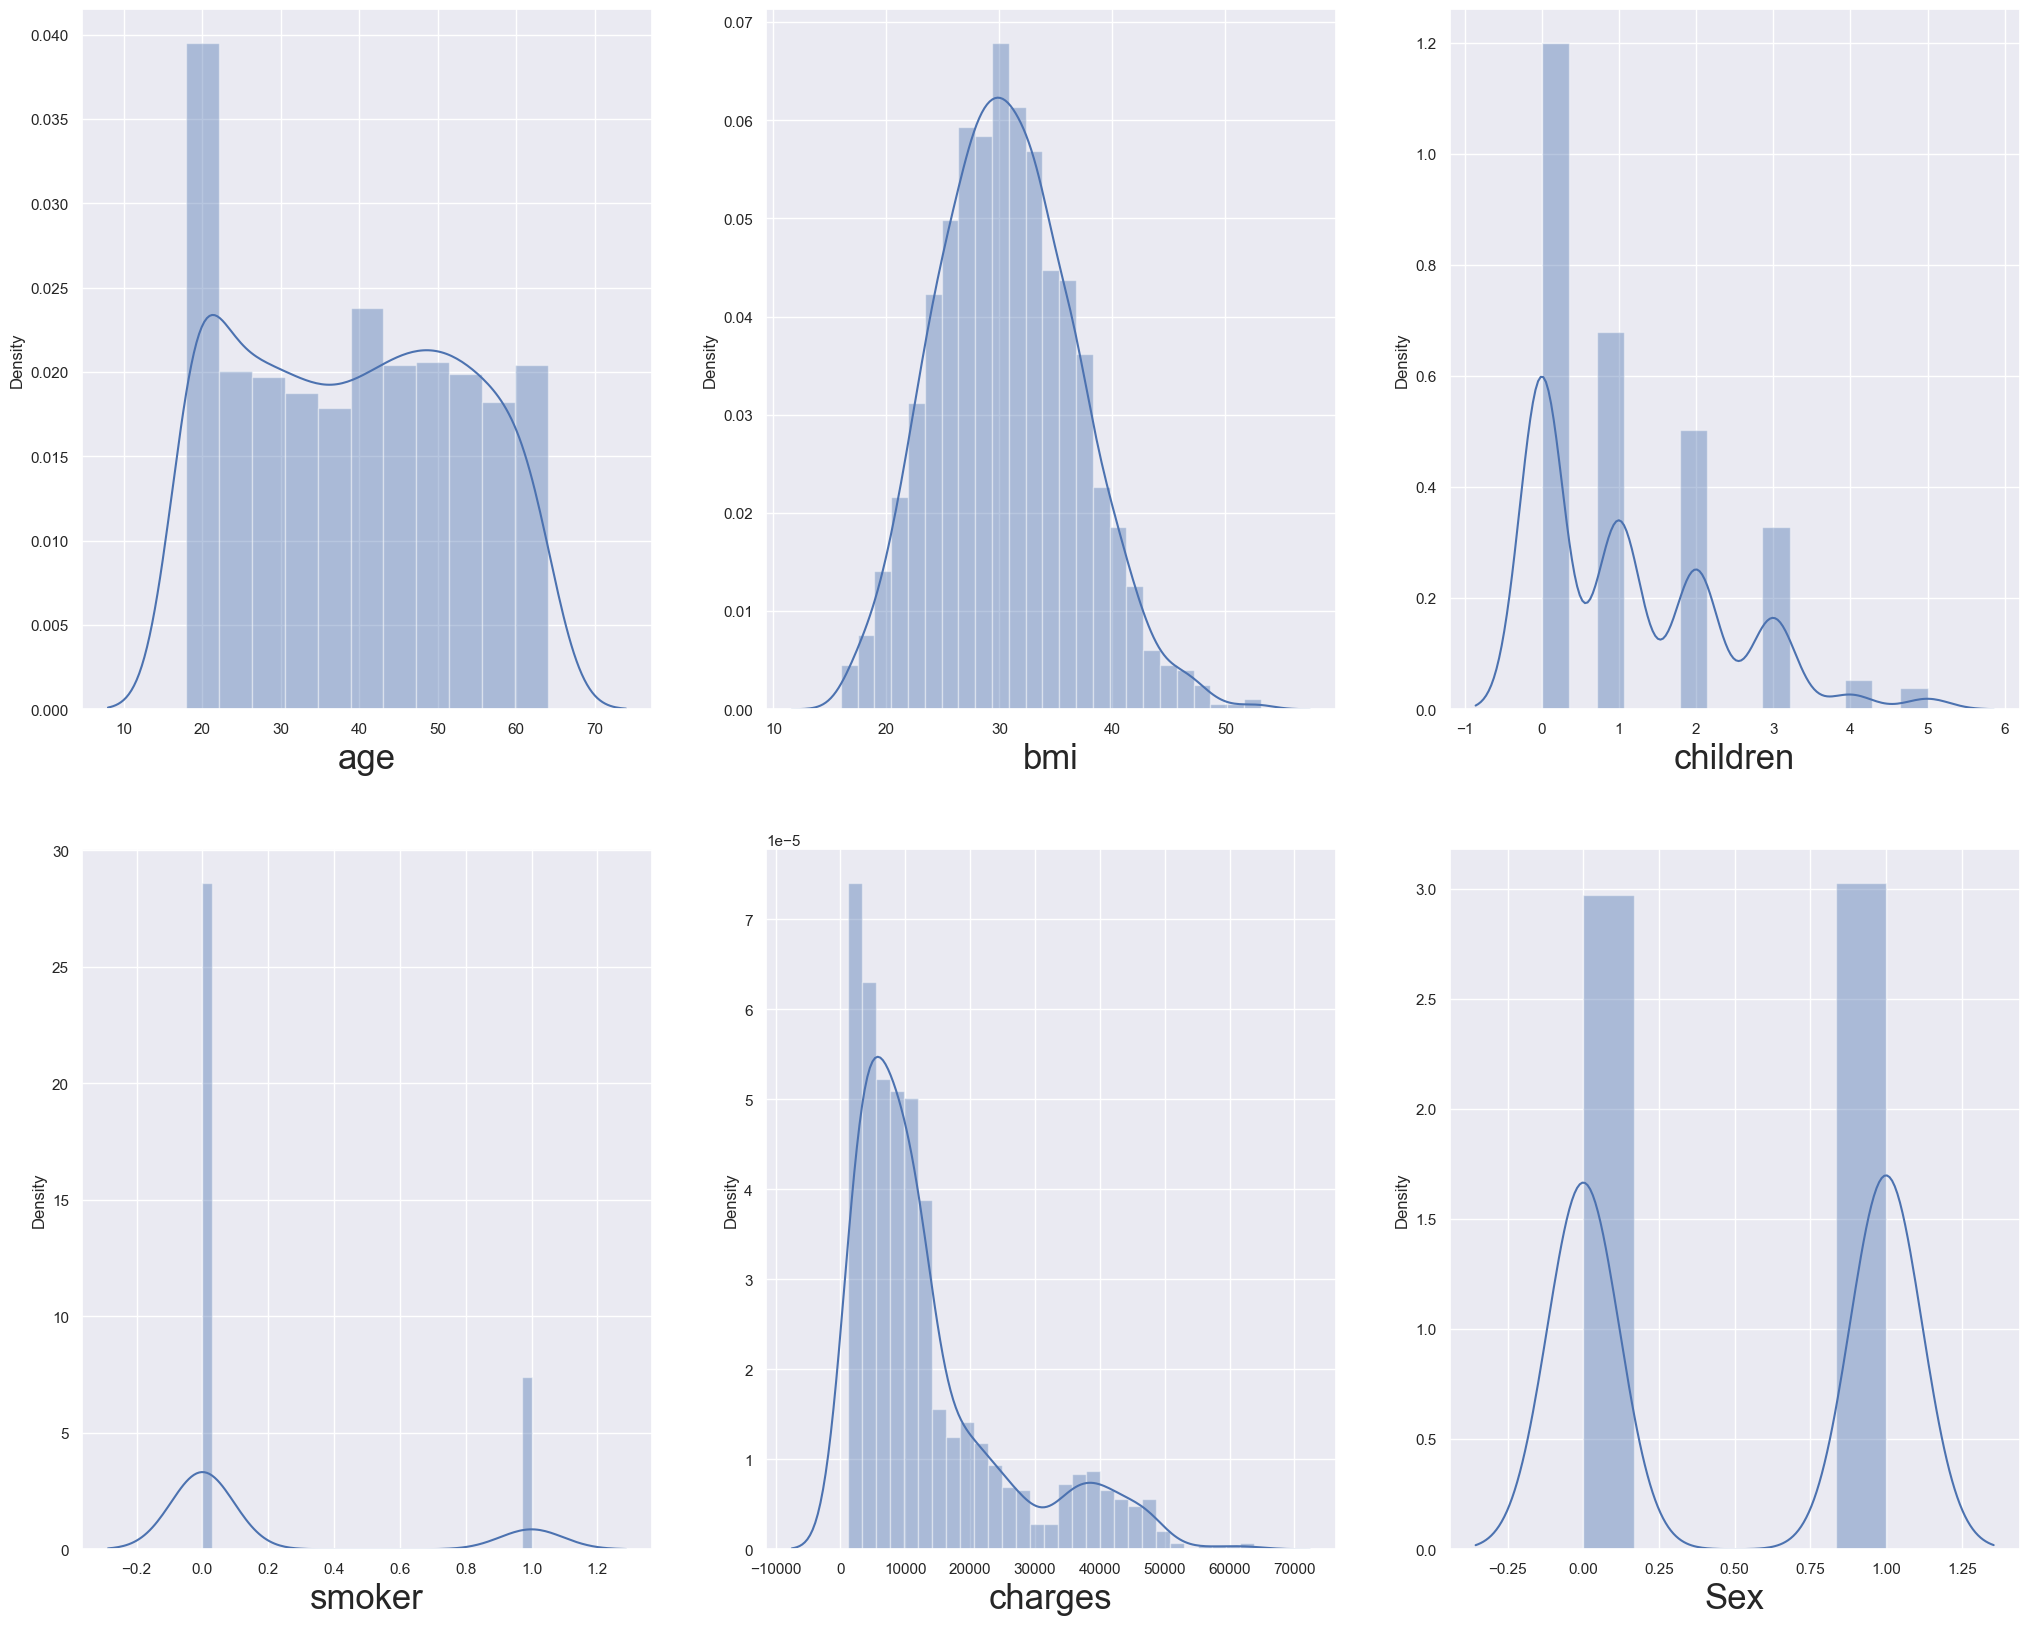

In [195]:
plt.figure(figsize=(25,20))
plot=1

for column in df2:
   if plot<=6:
       a=plt.subplot(2,3,plot)
       sns.distplot(df2[column])
       plt.xlabel(column, fontsize=25)
    
   plot +=1 
plt.show()

In [200]:
x1=df2.drop(columns=['charges'])
y1=df2['charges']



In [201]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.20, random_state = 8)


In [202]:
reg = LinearRegression()
reg.fit(x1_train.values, y1_train.values)


LinearRegression()

In [203]:
y1_pred = reg.predict(x1_train.values)

In [205]:
r2_ = metrics.r2_score(y1_train, y1_pred)

print('R squared value: ',r2_)

R squared value:  0.757379537592604


In [211]:
from sklearn.ensemble import RandomForestRegressor
rfmodel=RandomForestRegressor(random_state=30,n_estimators=90)
rfmodel.fit(x1_train,y1_train)

RandomForestRegressor(n_estimators=90, random_state=30)

In [214]:
y2_pred = rfmodel.predict(x1_train.values)

In [215]:
r2= metrics.r2_score(y1_train, y2_pred)

print('R squared value: ',r2)

R squared value:  0.9769895249159286


In [216]:
#we got a good model by randomforestregressor
x1

,age,bmi,children,smoker,Sex
0,19,27.900,0,1,0
1,18,33.770,1,0,1
2,28,33.000,3,0,1
3,33,22.705,0,0,1
4,32,28.880,0,0,1
...,...,...,...,...,...
1333,50,30.970,3,0,1
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [230]:
# let's predict for 
#Age=29, Bmi=25.7, children=3, female smoker
array_data = np.asarray((29,25.7,3,1,0))
reshaped = array_data.reshape(1,-1)
reshaped

array([[29. , 25.7,  3. ,  1. ,  0. ]])

In [231]:
prediction = rfmodel.predict(reshaped)

print('insurance charge is',prediction)

The insurance charge is $ [19112.17596689]
